# Semana Exploratory Data Analysis (EDA)

# Problema

- Uma escola necessita trabalhar com filmes em seu planejamento pedagógico.
- Ela necessita de visualizar as notas de diversos filmes em suas diversas categorias.
- Os filmes devem atravessar gerações.

# Ambientação Python

In [2]:
# comentário de uma linha

'''
    comentário de múltiplas linhas
'''
print('Hellor EDA!')
msg = input("Como será essa semana EDA?")
print(f'Nossa semana será muito {msg}!')

Hellor EDA!
Nossa semana será muito dadad!


## Características do Python

- Multiplataforma
- Data Science e IA
- Indentação
- Tipagem Dinâmica
- Bibliotecas
- Paradigma Funcional (Lambda)
- Paradigma Orientação a Objetos
- Paradigma Estrutural
- Microserviços

In [3]:
class Pessoa():
    def __init__(self,nome,idade):
        self.nome = nome
        self.idade = idade
        
    def pega_nome(self):
        return self.nome
    
    def dobro_idade(self):
        return self.idade * 2

In [4]:
pessoa = Pessoa("João",26)
pessoa.pega_nome()

'João'

### Exemplo funcional (Lambda)

In [5]:
# Instalar o NumPy
! pip install numpy


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# Instalar o Pandas
! pip install pandas


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
# Definindo um lambda
dobro = lambda x:x*2

### Criar uma matriz 4x3

In [8]:
import numpy as np
matriz_4x3 = np.array([[1,2,3,4],
                       [2,4,6,8],
                       [3,8,12,16],
                       [4,16,24,32]])

In [9]:
matriz_4x3

array([[ 1,  2,  3,  4],
       [ 2,  4,  6,  8],
       [ 3,  8, 12, 16],
       [ 4, 16, 24, 32]])

In [10]:
import pandas as pd

In [11]:
df = pd.DataFrame(matriz_4x3)

In [12]:
df.head()

,0,1,2,3
0,1,2,3,4
1,2,4,6,8
2,3,8,12,16
3,4,16,24,32


In [13]:
df_dobrado = df.apply(dobro)

In [14]:
df_dobrado.head()

,0,1,2,3
0,2,4,6,8
1,4,8,12,16
2,6,16,24,32
3,8,32,48,64


# Iniciando nosso primeiro EDA

## Solução - Melhores Filmes para a Escola

### Importando o DataSet

In [15]:
df_filmes = pd.read_csv('datasets/ratings.csv')

### Mostrando os cinco primeiros

In [16]:
df_filmes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Mostrando todas as  colunas

In [17]:
df_filmes.columns = ['usuario_id','filme_id','avaliacao','quando']

In [18]:
df_filmes.head()

,usuario_id,filme_id,avaliacao,quando
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Mostrar uma Série

In [19]:
df_filmes['avaliacao']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: avaliacao, Length: 100836, dtype: float64

### Uma forma mais sintética

In [20]:
df_filmes.avaliacao

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: avaliacao, Length: 100836, dtype: float64

### Dúvida, mas o que realmente é uma Série?

https://dataat.github.io/introducao-analise-de-dados-espaciais/python.html

### Nossa primeira EDA (analisar a quantidade de filmes por avaliações)

In [21]:
df_filmes.value_counts()

usuario_id  filme_id  avaliacao  quando    
610         170875    3.0        1493846415    1
1           1         4.0        964982703     1
            3         4.0        964981247     1
            6         4.0        964982224     1
610         160080    3.0        1493848031    1
                                              ..
1           151       5.0        964984041     1
            110       4.0        964982176     1
            101       5.0        964980868     1
            70        3.0        964982400     1
            50        5.0        964982931     1
Name: count, Length: 100836, dtype: int64

In [22]:
df_filmes.avaliacao.value_counts()

avaliacao
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

### A média de todas as notas


In [23]:
df_filmes.avaliacao.mean()

np.float64(3.501556983616962)

### Mostrar valores únicos?

In [24]:
df_filmes.avaliacao.unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

### Contando histórias com Histogramas

In [25]:
! pip install matplotlib

ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'C:\\Python312\\share'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/d2/92/c2b9464a0562feb6ae780bdc152364810862e07ef5e6affa2b7686028db2/matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/78/38/a046bb0ebce6f530175d434e7364149e338ffe1069ee286ed8ba7f6481ee/contourpy-1.2.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/6d/9a/b695930e1b4e6929cc60e294489421632a05c105ac8c56ee63ef56a47872/fonttools-4.53.1-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     --------- ----------------------------- 41.0/165.9 kB 2.0 MB/s 

In [26]:
! pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib!=3.6.1,>=3.4 from https://files.pythonhosted.org/packages/d2/92/c2b9464a0562feb6ae780bdc152364810862e07ef5e6affa2b7686028db2/matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata
  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/78/38/a046bb0ebce6f530175d434e7364149e338ffe1069ee286ed8ba7f6481ee/contourpy-1.2.1-cp312-cp312-win_amd64.whl.metadata
  Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Contar a história da quantidade de filmes por avaliações

<Axes: ylabel='Frequency'>

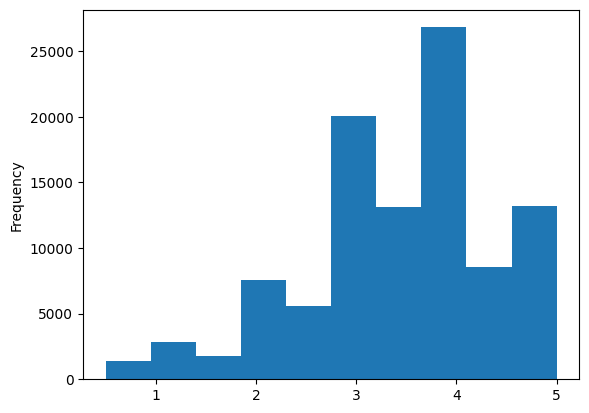

In [27]:
df_filmes.avaliacao.plot(kind='hist')

# Estatística Descritiva

In [28]:
df_filmes

,usuario_id,filme_id,avaliacao,quando
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [29]:
# Calculando a média
print(f'A média de avaliações é: {df_filmes.avaliacao.mean().round(2)}')

A média de avaliações é: 3.5


In [30]:
# Calculando a mediana
print(f'A mediana das avaliações é: {df_filmes.avaliacao.median().round(2)}')

A mediana das avaliações é: 3.5


In [31]:
# Calculando a soma
print(f'A soma das avaliações é: {df_filmes.avaliacao.sum()}')

A soma das avaliações é: 353083.0


## Importando Seaborn

In [32]:
import seaborn as sns

In [33]:
# Criando variável
notas = df_filmes.avaliacao

In [34]:
# Mostrando o cabeçalho
notas.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: avaliacao, dtype: float64

<Axes: ylabel='avaliacao'>

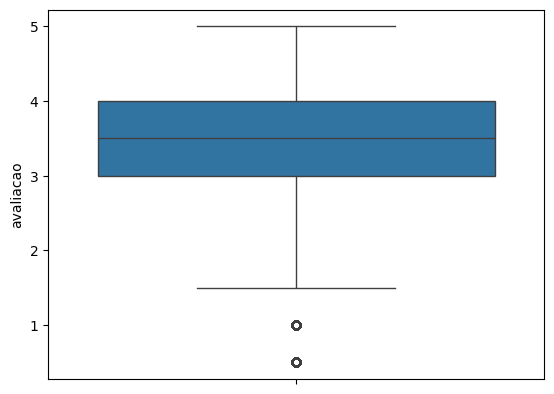

In [35]:
sns.boxplot(notas)

<Axes: xlabel='avaliacao'>

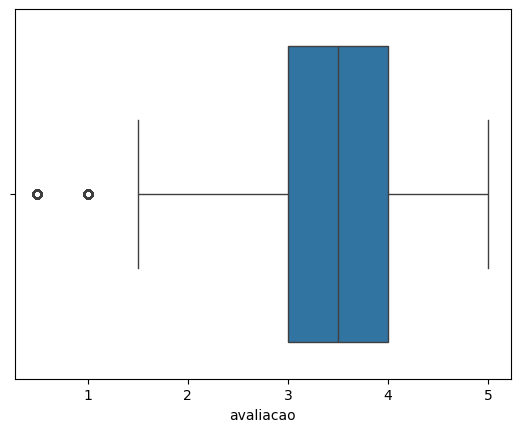

In [36]:
sns.boxplot(x=notas)

# Conclusão

- Gráfico Boxplto ou Caixa
- O objetivo dele é mostrar a mediana e os quartis

# DataSet movies.csv

In [37]:
df_filmes_todos = pd.read_csv('datasets/movies.csv')

In [38]:
df_filmes_todos.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [39]:
df_filmes_todos.columns = ['filme_id','Título','Gêneros']

In [40]:
df_filmes_todos.head()

,filme_id,Título,Gêneros
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [41]:
df_filmes_todos.query('filme_id == 1')

,filme_id,Título,Gêneros
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [42]:
df_filmes_todos.query('filme_id == 1')

,filme_id,Título,Gêneros
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [43]:
df_filmes.query('filme_id == 1').avaliacao


0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: avaliacao, Length: 215, dtype: float64

# Médias por filme (groupby())

### Como agrupar por filmes e calcular as médias de uma só vez

In [47]:
medias_por_filme = df_filmes.groupby('filme_id').mean()['avaliacao'].round(2)

In [50]:
medias_por_filme.head()

filme_id
1    3.92
2    3.43
3    3.26
4    2.36
5    3.07
Name: avaliacao, dtype: float64

<Axes: ylabel='Frequency'>

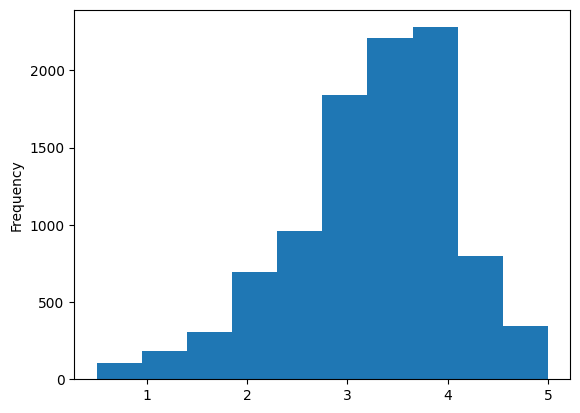

In [52]:
medias_por_filme.plot(kind='hist')

# Boxplot

<Axes: xlabel='avaliacao'>

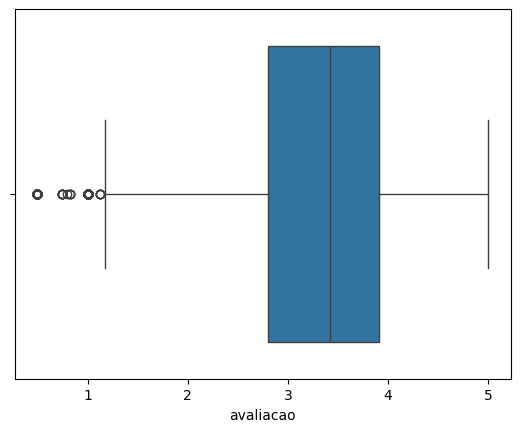

In [53]:
sns.boxplot(x=medias_por_filme)

In [55]:
medias_por_filme.describe()

count    9724.000000
mean        3.262465
std         0.869896
min         0.500000
25%         2.800000
50%         3.420000
75%         3.910000
max         5.000000
Name: avaliacao, dtype: float64

<Axes: xlabel='avaliacao', ylabel='Count'>

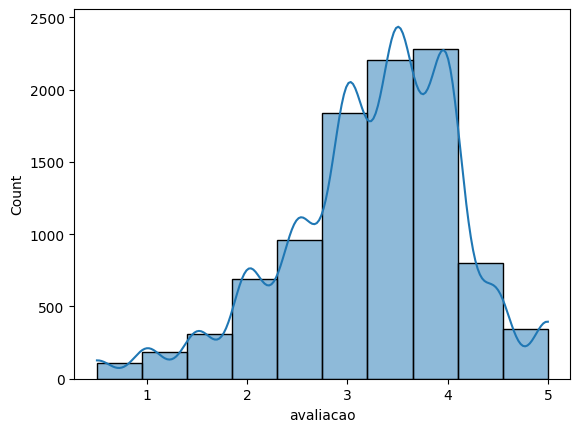

In [56]:
sns.histplot(medias_por_filme,kde=True,bins=10)

# Matplotlib

Text(0.5, 1.0, 'Contando uma história dos filmes')

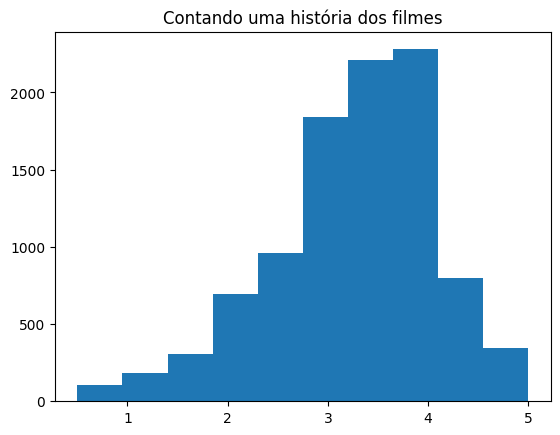

In [57]:
import matplotlib.pyplot as plt
plt.hist(medias_por_filme)
plt.title("Contando uma história dos filmes")